In [49]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [48]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [3]:
import dammit

In [186]:
from dammit.model import CRBL

In [187]:
reload(dammit)

<module 'dammit' from 'dammit/__init__.pyc'>

In [4]:
import seaborn as sns

In [7]:
import pandas as pd

In [100]:
from sklearn import svm
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
import numpy as np

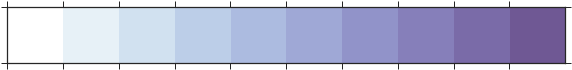

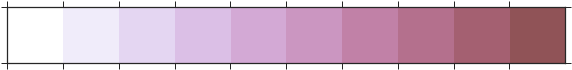

In [6]:
sns.set_style('ticks')
blue_ct_cmap = sns.cubehelix_palette(10, start=.5, rot=-.3, light=1, dark=.4, as_cmap=True)
red_ct_cmap = sns.cubehelix_palette(10, start=1.5, rot=-.5, light=1, dark=.4, as_cmap=True)

sns.palplot(blue_ct_cmap.colors[np.linspace(0, 255, 10, dtype=int)])
sns.palplot(red_ct_cmap.colors[np.linspace(0, 255, 10, dtype=int)])

In [88]:
def get_grid(mins, maxs, clf):
    xx, yy = np.meshgrid(np.linspace(mins, maxs, 1000),
                         np.linspace(mins, maxs, 1000))
    '''
    if hasattr(clf, 'decision_function'):
        Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    else:
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    '''
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    return xx, yy, Z

In [22]:
def scale_evalue(col):
    col.ix[col == 0.0] = 1e-256
    return -np.log10(col)

In [238]:
test_aln_A = pd.DataFrame([[0.0, 0.0, 200, 2000, 'tr_Aa', 200, '+', 70, 70, 'pr_Ba', 0, '+', 200, 200.0],
                           [1e-100, 1e-100, 200, 2000, 'tr_Aa', 200, '+', 70, 70, 'pr_Bb', 0, '+', 200, 200.0],
                           [0.0, 0.0, 200, 2000, 'tr_Ab', 200, '+', 70, 70, 'pr_Ba', 0, '+', 200, 200.0],
                           [0.0, 0.0, 200, 2000, 'tr_Ac', 200, '+', 70, 70, 'pr_Bc', 0, '+', 200, 200.0]],
                          columns=[u'E', u'EG2', u'q_aln_len', u'q_len', u'q_name', u'q_start',
                                   u'q_strand', u's_aln_len', u's_len', u's_name', u's_start', u's_strand',
                                   u'score', u'bitscore'])

In [239]:
test_aln_B = pd.DataFrame([[0.0, 0.0, 200, 2000, 'pr_Ba', 200, '+', 70, 70, 'tr_Aa', 0, '+', 200, 200.0],
                           [0.0, 0.0, 200, 2000, 'pr_Ba', 200, '+', 70, 70, 'tr_Ac', 0, '+', 200, 200.0],
                           [1e-100, 1e-100, 200, 2000, 'pr_Ba', 200, '+', 70, 70, 'tr_Ab', 0, '+', 200, 200.0],
                           [0.0, 0.0, 200, 2000, 'pr_Bb', 200, '+', 70, 70, 'tr_Aa', 0, '+', 200, 200.0]],
                          columns=[u'E', u'EG2', u'q_aln_len', u'q_len', u'q_name', u'q_start',
                                   u'q_strand', u's_aln_len', u's_len', u's_name', u's_start', u's_strand',
                                   u'score', u'bitscore'])5

In [240]:
CRBL.reciprocal_best_hits(test_aln_A, test_aln_B)

,E,EG2_x,q_aln_len,q_len,q_name,q_start_x,q_strand_x,s_aln_len_x,s_len_x,s_start_x,...,s_len,s_name,q_start_y,q_strand_y,s_aln_len_y,s_len_y,s_start_y,s_strand_y,score_y,bitscore_y
0,0,0,200,2000,tr_Aa,200,+,70,70,0,...,2000,pr_Ba,200,+,70,70,0,+,200,200


In [228]:
bh_df.columns

Index([u'E', u'EG2', u'q_aln_len', u'q_len', u'q_name', u'q_start',
       u'q_strand', u's_aln_len', u's_len', u's_name', u's_start', u's_strand',
       u'score', u'bitscore', u'RBH'],
      dtype='object')

In [191]:
rbh_df = pd.read_csv('pom.500.fa.dammit/pom.500.fa.transdecoder.pep.rbhx.pep.fa.csv')
rbh_df['E'] = scale_evalue(rbh_df['E'].copy())

In [192]:
bh_df = pd.concat([group for group in dammit.parsers.maf_to_df_iter('pom.500.fa.dammit/pom.500.fa.x.pep.fa.maf')])
bh_df['E'] = scale_evalue(bh_df['E'].copy())

In [193]:
bh_df['RBH'] = False
bh_df.ix[rbh_df.index, 'RBH'] = True

In [200]:
bh_df.sort_values(by=['q_name', 'E'], ascending=False).drop_duplicates(subset='q_name').query('RBH == True')

,E,EG2,q_aln_len,q_len,q_name,q_start,q_strand,s_aln_len,s_len,s_name,s_start,s_strand,score,bitscore,RBH
172,51.920819,1.400000e-44,210,2270,SPAPJ695.02_74452_76721_-1_SPAPJ695.02_I_prote...,811,+,70,70,SPAPJ695.02_SPAPJ695.02_I_Schizosaccharomyces,0,+,385,205.442170,True
168,99.431798,3.900000e-86,351,587,SPAPJ695.01c_77480_78066_-1_SPAPJ695.01c_I_pro...,135,+,117,117,SPAPJ695.01c_SPAPJ695.01c_I_S.,0,+,647,343.501215,True
54,114.154902,1.600000e-101,399,747,SPAC977.18_31140_32345_-1_SPAC977.18_I_protein...,158,+,133,133,SPAC977.18_SPAC977.18_I_conserved,0,+,744,394.614678,True
167,256.000000,0.000000e+00,1794,3603,SPAC977.17_66219_69821_1_SPAC977.17_I_protein_...,924,+,598,598,SPAC977.17_SPAC977.17_I_MIP,0,+,3447,1818.941394,True
153,256.000000,0.000000e+00,1773,2421,SPAC977.16c_64559_66980_-1_dak2_I_protein_codi...,300,+,591,591,SPAC977.16c_dak2_I_dihydroxyacetone,0,+,3254,1717.241410,True
160,237.920819,4.400000e-212,741,902,SPAC977.15_62961_63862_1_SPAC977.15_I_protein_...,28,+,247,247,SPAC977.15_SPAC977.15_I_dienelactone,0,+,1441,761.893894,True
159,282.522879,3.100000e-258,975,1294,SPAC977.14c_59614_60907_-1_SPAC977.14c_I_prote...,215,+,325,325,SPAC750.01_SPAC750.01_I_aldo_keto,0,+,1732,915.234284,True
155,320.886260,8.100000e-293,1068,1364,SPAC977.12_56373_57736_1_SPAC977.12_I_protein_...,119,+,356,356,SPAC977.12_SPAC977.12_I_L-asparaginase,0,+,1950,1030.107841,True
157,290.420216,2.900000e-264,933,1250,SPAC977.11_55059_56308_1_SPAC977.11_I_protein_...,215,+,311,311,SPAC977.11_SPAC977.11_I_CRCB,0,+,1770,935.258115,True
82,256.000000,0.000000e+00,1404,2836,SPAC977.10_50946_53858_1_sod2_I_protein_coding...,1171,+,468,468,SPAC977.10_sod2_I_plasma,0,+,2609,1377.363226,True


In [208]:
pep_x_db_df = pd.concat([group for group in dammit.parsers.maf_to_df_iter('pom.500.fa.dammit/pom.500.fa.transdecoder.pep.x.pep.fa.maf')])

In [209]:
db_x_pep_df = pd.concat([group for group in dammit.parsers.maf_to_df_iter('pom.500.fa.dammit/pep.fa.x.pom.500.fa.transdecoder.pep.maf')])

In [210]:
rbh_pep_df = CRBL.reciprocal_best_hits(pep_x_db_df, db_x_pep_df)

In [223]:
rbh_pep_df

,E,EG2_x,q_aln_len,q_len,q_name,q_start_x,q_strand_x,s_aln_len_x,s_len_x,s_start_x,...,s_len,s_name,q_start_y,q_strand_y,s_aln_len_y,s_len_y,s_start_y,s_strand_y,score_y,bitscore_y
0,0.000000e+00,0.000000e+00,1473,1474,SPAC10F6.01c_1200916_1206090_-1_sir1_I_protein...,0,+,1473,1473,0,...,1473,SPAC10F6.01c_sir1_I_sulfite,0,+,1473,1474,0,+,7597,3356.382439
1,0.000000e+00,0.000000e+00,1168,1169,SPAC10F6.02c_1206812_1210630_-1_prp22_I_protei...,0,+,1168,1168,0,...,1168,SPAC10F6.02c_prp22_I_ATP-dependent,0,+,1168,1169,0,+,6008,2655.044067
2,0.000000e+00,0.000000e+00,600,601,SPAC10F6.03c_1211195_1213553_-1_cts1_I_protein...,0,+,600,600,0,...,600,SPAC10F6.03c_cts1_I_CTP,0,+,600,601,0,+,3123,1381.689000
3,1.500000e-275,1.100000e-234,351,352,SPAC10F6.04_1213255_1216120_1_SPAC10F6.04_I_pr...,0,+,351,351,0,...,351,SPAC10F6.04_SPAC10F6.04_I_RCC,0,+,351,352,0,+,1889,837.037300
5,3.700000e-173,3.700000e-143,227,243,SPAC10F6.05c_1214788_1217067_-1_ubc6_I_protein...,15,+,227,227,0,...,227,SPAC10F6.05c_ubc6_I_ubiquitin,0,+,227,243,15,+,1200,532.932745
6,1.600000e-184,3.000000e-153,257,258,SPAC10F6.06_1217077_1218228_1_vip1_I_protein_c...,0,+,257,257,0,...,257,SPAC10F6.06_vip1_I_RNA-binding,0,+,257,258,0,+,1276,566.476934
7,1.400000e-142,1.600000e-115,188,189,SPAC10F6.07c_1218321_1218887_-1_mug94_I_protei...,0,+,188,188,0,...,188,SPAC10F6.07c_mug94_I_Schizosaccharomyces,0,+,188,189,0,+,992,441.127596
8,2.100000e-249,1.600000e-212,341,358,SPAC10F6.08c_1219667_1220847_-1_nht1_I_protein...,16,+,341,341,0,...,341,SPAC10F6.08c_nht1_I_Ino80,0,+,341,358,16,+,1722,763.328358
9,0.000000e+00,0.000000e+00,908,916,SPAC10F6.09c_1220969_1224862_-1_psm3_I_protein...,8,+,908,1194,0,...,1194,SPAC10F6.09c_psm3_I_mitotic,0,+,908,916,8,+,4532,2003.580608
10,3.400000e-57,8.700000e-40,79,96,SPAC11D3.01c_108732_109195_-1_SPAC11D3.01c_I_p...,16,+,79,79,0,...,79,SPAC11D3.01c_SPAC11D3.01c_I_conserved,0,+,79,96,16,+,422,189.546179


In [227]:
for key, row in rbh_df.iterrows():
    print row.q_name, '\t', row.s_name, '\n'

SPAC10F6.01c_1200916_1206090_-1_sir1_I_protein_coding_sulfite|m.826 	SPAC10F6.01c_sir1_I_sulfite 

SPAC10F6.02c_1206812_1210630_-1_prp22_I_protein_coding_ATP-dependent|m.834 	SPAC10F6.02c_prp22_I_ATP-dependent 

SPAC10F6.03c_1211195_1213553_-1_cts1_I_protein_coding_CTP|m.835 	SPAC10F6.03c_cts1_I_CTP 

SPAC10F6.04_1213255_1216120_1_SPAC10F6.04_I_protein_coding_RCC|m.839 	SPAC10F6.04_SPAC10F6.04_I_RCC 

SPAC10F6.05c_1214788_1217067_-1_ubc6_I_protein_coding_ubiquitin|m.841 	SPAC10F6.05c_ubc6_I_ubiquitin 

SPAC10F6.06_1217077_1218228_1_vip1_I_protein_coding_RNA-binding|m.843 	SPAC10F6.06_vip1_I_RNA-binding 

SPAC10F6.07c_1218321_1218887_-1_mug94_I_protein_coding_Schizosaccharomyces|m.844 	SPAC10F6.07c_mug94_I_Schizosaccharomyces 

SPAC10F6.08c_1219667_1220847_-1_nht1_I_protein_coding_Ino80|m.846 	SPAC10F6.08c_nht1_I_Ino80 

SPAC10F6.09c_1220969_1224862_-1_psm3_I_protein_coding_mitotic|m.847 	SPAC10F6.09c_psm3_I_mitotic 

SPAC10F6.10_1225464_1227365_1_rio1_I_protein_coding_protein|m.848 	SP

In [206]:
db_x_pep_df.s_name[0]

'SPAC212.11_1_5662_-1_tlh1_I_protein_coding_RecQ|m.1'

In [183]:
len(bh_df.query('RBH == True'))

478

In [116]:
scaler = preprocessing.StandardScaler()
scaler.fit(bh_df.query('RBH == True')[['E', 'q_len']])

StandardScaler(copy=True, with_mean=True, with_std=True)

In [117]:
rbh_df[['E', 'q_len']] = scaler.transform(rbh_df[['E', 'q_len']])

In [118]:
bh_df[['E', 'q_len']] = scaler.transform(bh_df[['E', 'q_len']])

In [190]:
len(bh_df)

500

In [188]:
CRBL.best_hits(bh_df)

In [189]:
len(bh_df.query('RBH == True'))

81

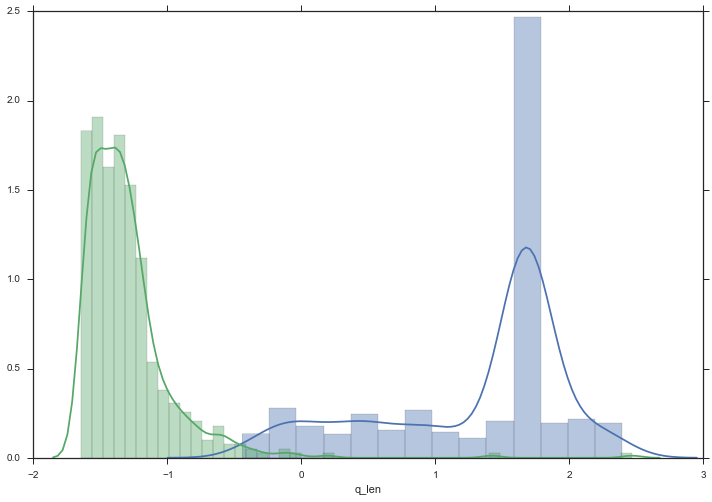

In [120]:
sns.distplot(rbh_df['E'], label='E')
sns.distplot(rbh_df['q_len'], label='Length')

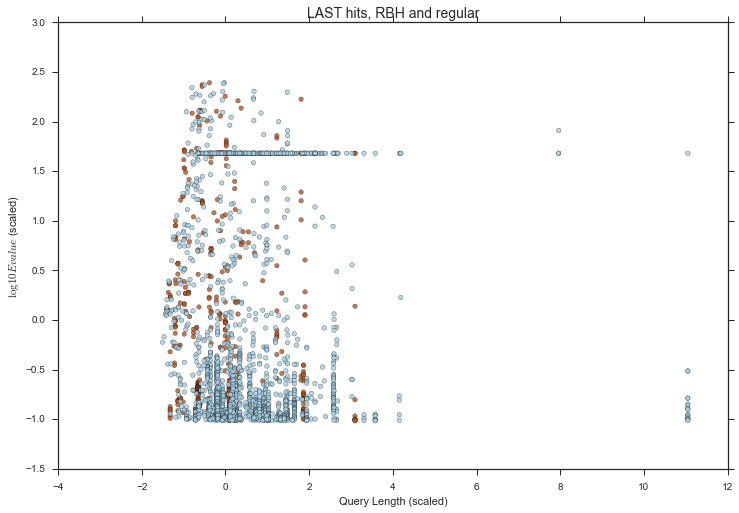

In [148]:
figsize(12,8)
scatter(bh_df.q_len, bh_df.E, c=bh_df.RBH, cmap=plt.cm.Paired, alpha=0.8)
xlabel('Query Length (scaled)')
ylabel('$\log10 Evalue$ (scaled)')
title('LAST hits, RBH and regular', fontsize=14)
savefig('sigh.svg')

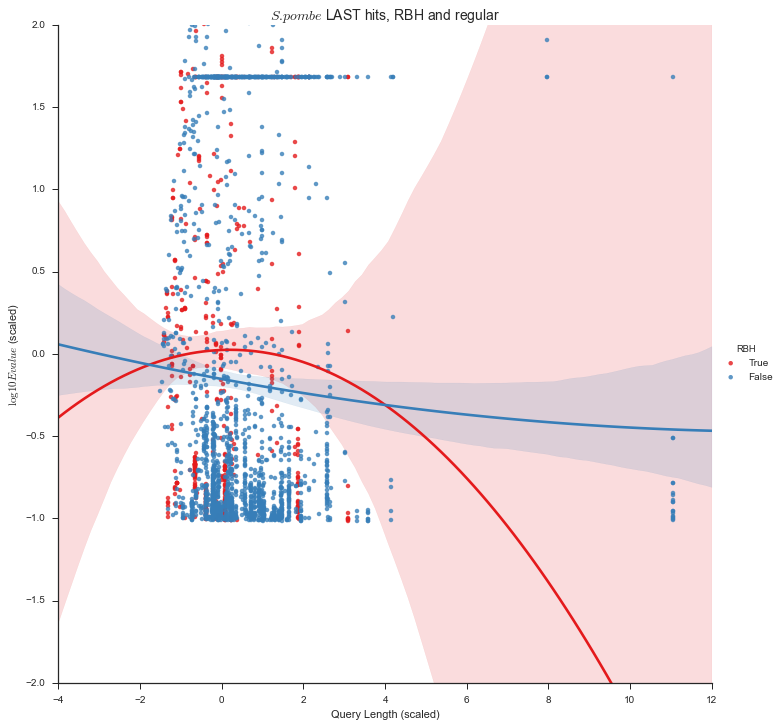

In [168]:
g = sns.lmplot('q_len', 'E', bh_df,  size=10, 
                   hue='RBH', order=2, palette=sns.color_palette('Set1'))
g = (g.set_axis_labels("Query Length (scaled)", "$\log10 Evalue$ (scaled)"))
title(r'$S. pombe$ LAST hits, RBH and regular', fontsize=14)
axis(ymax=2, ymin=-2)
savefig('sigh2.svg')

<bound method FacetGrid.despine of <seaborn.axisgrid.FacetGrid object at 0x10f622390>>

In [133]:
np.linspace(bh_df.q_len.min(), bh_df.q_len.max(), 500)

array([ -1.50237213e+00,  -1.47722045e+00,  -1.45206877e+00,
        -1.42691709e+00,  -1.40176541e+00,  -1.37661374e+00,
        -1.35146206e+00,  -1.32631038e+00,  -1.30115870e+00,
        -1.27600702e+00,  -1.25085534e+00,  -1.22570366e+00,
        -1.20055198e+00,  -1.17540030e+00,  -1.15024862e+00,
        -1.12509694e+00,  -1.09994526e+00,  -1.07479358e+00,
        -1.04964191e+00,  -1.02449023e+00,  -9.99338547e-01,
        -9.74186867e-01,  -9.49035188e-01,  -9.23883509e-01,
        -8.98731830e-01,  -8.73580151e-01,  -8.48428471e-01,
        -8.23276792e-01,  -7.98125113e-01,  -7.72973434e-01,
        -7.47821754e-01,  -7.22670075e-01,  -6.97518396e-01,
        -6.72366717e-01,  -6.47215037e-01,  -6.22063358e-01,
        -5.96911679e-01,  -5.71760000e-01,  -5.46608320e-01,
        -5.21456641e-01,  -4.96304962e-01,  -4.71153283e-01,
        -4.46001604e-01,  -4.20849924e-01,  -3.95698245e-01,
        -3.70546566e-01,  -3.45394887e-01,  -3.20243207e-01,
        -2.95091528e-01,

In [136]:
pd.rolling_mean(bh_df.set_index('q_len')['E'], 10)

q_len
 3.094732         NaN
 3.094732         NaN
-0.687470         NaN
-0.959387         NaN
-0.959387         NaN
-0.959387         NaN
 3.094732         NaN
-1.400403         NaN
-1.400403         NaN
-1.400403    0.638555
-0.687470    0.462870
-0.687470    0.287185
 3.094732    0.033922
-0.959387   -0.091736
 3.094732   -0.215210
 3.094732   -0.343245
 3.094732   -0.456894
 3.094732   -0.568641
 3.094732   -0.680564
 3.094732   -0.789175
-0.606744   -0.570201
-0.606744   -0.351228
-0.606744   -0.059487
-0.606744    0.243277
-0.344174    0.504460
-0.984030    0.777044
-0.984030    1.048110
-0.984030    1.318149
-0.984030    1.571854
-0.984030    1.826568
               ...   
 1.483621   -0.199843
 0.101091    0.059302
 1.483621    0.341218
 1.483621    0.618060
 1.483621    0.889124
 1.483621    1.103656
 1.483621    1.110536
 1.483621    1.143865
 1.483621    0.938542
 1.483621    0.976199
 1.483621    0.751432
 0.681465    0.813889
-0.802185    0.857221
-0.737604    0.806812
 0.1

In [95]:
svc_clf = svm.SVC()

In [101]:
gnb = GaussianNB()

In [97]:
svc_clf.fit(bh_df[['q_len', 'E']], bh_df.RBH.astype(int))

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [106]:
bh_df

,E,EG2,q_aln_len,q_len,q_name,q_start,q_strand,s_aln_len,s_len,s_name,s_start,s_strand,score,bitscore,RBH
0,1.164817,0.000000e+00,5661,12.714760,SPAC212.11_1_5662_-1_tlh1_I_protein_coding_RecQ,0,+,1887,1887,SPAC212.11_tlh1_I_RecQ,0,+,10676,5628.211770,True
1,1.164817,0.000000e+00,5661,12.714760,SPAC212.11_1_5662_-1_tlh1_I_protein_coding_RecQ,0,+,1887,1919,SPBCPT2R1.08c_tlh2_II_RecQ,0,+,10676,5628.211770,True
2,1.209665,1.300000e-237,834,1.858059,SPAC212.08c_11784_12994_1_SPAC212.08c_I_protei...,374,+,278,278,SPAC212.08c_SPAC212.08c_I_S.,0,+,1602,846.731705,True
3,-0.095597,1.400000e-116,441,1.077528,SPAC212.06c_18042_18974_1_SPAC212.06c_I_protei...,30,+,147,147,SPAC212.06c_SPAC212.06c_I_DNA,0,+,839,444.674256,True
4,-0.153000,2.400000e-111,462,1.077528,SPAC212.06c_18042_18974_1_SPAC212.06c_I_protei...,0,+,168,1887,SPAC212.11_tlh1_I_RecQ,1477,+,806,427.285140,True
5,-0.153000,2.400000e-111,462,1.077528,SPAC212.06c_18042_18974_1_SPAC212.06c_I_protei...,0,+,168,1919,SPBCPT2R1.08c_tlh2_II_RecQ,1477,+,806,427.285140,True
6,-0.272948,4.700000e-104,474,12.714760,SPAC212.11_1_5662_-1_tlh1_I_protein_coding_RecQ,4461,+,144,147,SPAC212.06c_SPAC212.06c_I_DNA,0,+,760,403.045765,True
7,-0.296894,8.900000e-90,369,-0.188396,SPAC212.12_15855_16226_1_SPAC212.12_I_protein_...,0,+,123,123,SPAC212.12_SPAC212.12_I_S.,0,+,670,355.620902,True
8,-0.296894,8.900000e-90,369,-0.188396,SPAC212.12_15855_16226_1_SPAC212.12_I_protein_...,0,+,123,123,SPAC750.07c_SPAC750.07c_I_S.,0,+,670,355.620902,True
9,-0.337173,2.700000e-86,371,-0.188396,SPAC212.12_15855_16226_1_SPAC212.12_I_protein_...,0,+,127,278,SPAC212.08c_SPAC212.08c_I_S.,0,+,648,344.028158,True


In [105]:
pred = gnb.fit(bh_df[['q_len', 'E']], bh_df.RBH.astype(int)).predict(bh_df[['q_len', 'E']])

In [98]:
xx, yy, zz = get_grid(-5, 15, svc_clf)

(-5.0, 15.0)

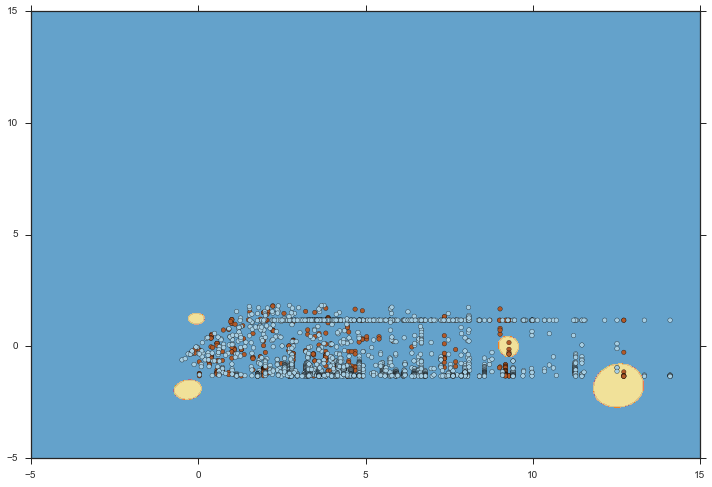

In [99]:
figsize(12,8)
plt.contourf(xx, yy, zz, cmap=plt.cm.Paired, alpha=0.8)
# Plot also the training points
plt.scatter(bh_df['q_len'], bh_df['E'], c=bh_df.RBH.astype(int), cmap=plt.cm.Paired)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())